In [5]:
# Importar librerías necesarias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import payments_manager as pm
import numpy as np

#pm.help()
pm.init(debug=True)
pm.info()
df_jo = pm.df('df_jo')
df_jo.info()
pm.info()
cr_cp=pm.df('cr_cp')
fe_cp=pm.df('fe_cp')

Lista de dataframes: ['cr', 'fe', 'cr_cp', 'fe_cp', 'df_jo', 'df_jall']
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32094 entries, 0 to 32093
Data columns (total 32 columns):
 #   Column                      Non-Null Count  Dtype          
---  ------                      --------------  -----          
 0   id_cr                       32094 non-null  int64          
 1   amount                      32094 non-null  float64        
 2   stat_cr                     32094 non-null  object         
 3   created_at                  32094 non-null  datetime64[ns] 
 4   user_id                     32094 non-null  int64          
 5   active                      32094 non-null  int64          
 6   moderated_at                21759 non-null  datetime64[ns] 
 7   reimbursement_date          32094 non-null  datetime64[ns] 
 8   cash_request_received_date  24149 non-null  datetime64[ns] 
 9   money_back_date             23917 non-null  datetime64[ns] 
 10  transfer_type               32094 

In [6]:
# Crear columna 'Cohorte' que indica el mes de la primera solicitud de cada cliente
df_jo['Cohorte'] = df_jo.groupby('user_id')['created_at'].transform('min').dt.to_period('M')
df_jo.head(10)

,id_cr,amount,stat_cr,created_at,user_id,active,moderated_at,reimbursement_date,cash_request_received_date,money_back_date,...,category,fee,created_at_fe,paid_at,from_date,to_date,charge_moment,cr_received_date,to_reimbur_cash_de,Cohorte
0,5,100.0,rejected,2019-12-10 19:05:21.596873,804,1,2019-12-11 16:47:42.405646,2020-01-09 19:05:21.596363,NaT,NaT,...,NaN,NaN,NaT,NaT,NaT,NaT,NaN,NaT,NaN,2019-12
1,70,100.0,rejected,2019-12-10 19:50:12.347780,231,1,2019-12-11 14:24:22.897988,2020-01-09 19:50:12.347780,NaT,NaT,...,NaN,NaN,NaT,NaT,NaT,NaT,NaN,NaT,NaN,2019-12
2,7,100.0,rejected,2019-12-10 19:13:35.825460,191,1,2019-12-11 09:46:59.777728,2020-01-09 19:13:35.825041,NaT,NaT,...,NaN,NaN,NaT,NaT,NaT,NaT,NaN,NaT,NaN,2019-12
3,10,99.0,rejected,2019-12-10 19:16:10.880172,761,1,2019-12-18 14:26:18.128407,2020-01-09 19:16:10.879606,NaT,NaT,...,NaN,NaN,NaT,NaT,NaT,NaT,NaN,NaT,NaN,2019-12
4,1594,100.0,rejected,2020-05-06 09:59:38.877376,7686,1,2020-05-07 09:21:55.320193,2020-06-05 22:00:00.000000,NaT,NaT,...,NaN,NaN,NaT,NaT,NaT,NaT,NaN,NaT,NaN,2020-05
5,2145,100.0,money_back,2020-05-23 20:58:55.129432,9489,1,2020-05-24 12:40:33.054910,2020-06-06 22:00:00.000000,2020-05-26,2020-07-06 03:36:03.023521,...,NaN,NaN,NaT,NaT,NaT,NaT,NaN,2020-05-26,NaN,2020-05
6,3512,100.0,rejected,2020-06-16 17:07:38.452652,14631,1,2020-06-17 10:21:21.360742,2020-07-11 23:51:00.000000,NaT,NaT,...,NaN,NaN,NaT,NaT,NaT,NaT,NaN,NaT,NaN,2020-06
7,654,100.0,rejected,2020-02-10 01:11:53.808270,99000309,0,2020-02-10 09:11:21.350695,2020-03-11 01:11:53.807930,NaT,NaT,...,NaN,NaN,NaT,NaT,NaT,NaT,NaN,NaT,NaN,2020-01
8,5672,100.0,canceled,2020-06-28 12:06:33.712840,99002499,0,NaT,2020-07-07 22:00:00.000000,NaT,NaT,...,NaN,NaN,NaT,NaT,NaT,NaT,NaN,NaT,NaN,2020-06
9,71,90.0,rejected,2019-12-10 19:51:23.911206,897,1,2019-12-12 15:06:11.190299,2019-12-17 19:51:23.910748,NaT,NaT,...,NaN,NaN,NaT,NaT,NaT,NaT,NaN,NaT,NaN,2019-12


In [7]:
cr_cp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype          
---  ------                      --------------  -----          
 0   id                          23970 non-null  int64          
 1   amount                      23970 non-null  float64        
 2   status                      23970 non-null  object         
 3   created_at                  23970 non-null  datetime64[ns] 
 4   updated_at                  23970 non-null  datetime64[ns] 
 5   user_id                     23970 non-null  int64          
 6   moderated_at                16035 non-null  datetime64[ns] 
 7   deleted_account_id          2104 non-null   float64        
 8   reimbursement_date          23970 non-null  datetime64[ns] 
 9   cash_request_received_date  16289 non-null  datetime64[ns] 
 10  money_back_date             16543 non-null  datetime64[ns] 
 11  transfer_type               23970 non-nul

In [11]:
# Agrupar los datos para calcular las métricas de morosos
morosos_analysis = df_jo.groupby(['user_id', 'Mes_created_at']).agg(
    Num_Clientes=('user_id', 'nunique'),  # Número de clientes únicos por cohorte y mes
    #Num_Solicitudes=('id_cr', 'nunique'),  # Total de solicitudes únicas por cohorte y mes
    Solicitudes_Instant=('transfer_type', lambda x: (x == 'instant').sum()),  # Solicitudes tipo 'instant' 
    Solicitudes_Regular=('transfer_type', lambda x: (x == 'regular').sum()),  # Solicitudes tipo 'regular' 
    #Clientes_con_fees=('fee', lambda x: (x > 0).sum()),  # Clientes con fees por cohorte y mes
    CR=('id_cr', lambda ids: df_jo.loc[ids.index].drop_duplicates(subset='id_cr')['amount'].sum()),  # Total de adelantos únicos
    Fees=('fee', 'sum'),  # Total de fees 
    # Contar las líneas con 'cr_received_date' no nulo
    cr_received_nonull=('cr_received_date', lambda x: (x.notnull()).sum()),
    #paid_fees=('stat_fe', lambda x: (x == 'accepted').sum()),  
    # Contar las líneas con 'stat_fe' != 'accepted'
    non_paid_fees=('stat_fe', lambda x: (x != 'accepted').sum()),
    # Sumar 'total_amount' cuando 'stat_fe' == 'accepted'
    #total_paid_fees=('fee', lambda x: x[df_jo.loc[x.index, 'stat_fe'] == 'accepted'].sum()),
    # Sumar 'total_amount' cuando 'stat_fe' != 'accepted'
    total_non_paid_fees=('fee', lambda x: x[df_jo.loc[x.index, 'stat_fe'] != 'accepted'].sum()),
    # Contar las líneas con 'stat_cr' == 'money_back'
    #paid_cr=('stat_cr', lambda x: (x == 'money_back').sum()),  
    # Contar las líneas con 'stat_fe' != 'accepted'
    non_paid_cr=('stat_cr', lambda x: (x != 'money_back').sum()),
    # Sumar 'total_amount' cuando 'stat_fe' == 'accepted'
    #total_paid_cr=('amount', lambda x: x[df_jo.loc[x.index, 'stat_cr'] == 'money_back'].sum()),
    # Sumar 'total_amount' cuando 'stat_fe' != 'accepted'
    total_non_paid_cr=('amount', lambda x: x[df_jo.loc[x.index, 'stat_cr'] != 'money_back'].sum()),
    # Métrica de "credit lapse" (diferencia entre reimbursement_date y created_at)
    #credit_lapse=('reimbursement_date', lambda x: (x - df_jo.loc[x.index, 'created_at']).dt.days.mean()),
    # Métrica de "credit payment lapse" (diferencia entre money_back_date y reimbursement_date)
    #credit_payment_lapse=('money_back_date', lambda x: (x - df_jo.loc[x.index, 'reimbursement_date']).dt.days.mean())

).reset_index()

# Calcular los porcentajes de non_paid_fees
morosos_analysis['non_paid_fees_percent'] = (morosos_analysis['total_non_paid_fees'] / (morosos_analysis['Fees']))*100
#morosos_analysis['nonpaid_fees_percent_amount'] = (cohort_analysis['total_paid_fees'] / cohort_analysis['Fees'])   # % en monto
morosos_analysis['non_paid_cr_percent'] = (morosos_analysis['total_non_paid_cr'] / (morosos_analysis['CR'] + morosos_analysis['cr_received_nonull']))*100
#morosos_analysis['paid_cr_percent_amount'] = (cohort_analysis['total_paid_cr'] / cohort_analysis['CR'])   # % en monto
morosos_analysis['index'] = (morosos_analysis['total_non_paid_fees'] / morosos_analysis['total_non_paid_cr'])   # % index

# Mostrar los resultados de las cohortes por mes
morosos_analysis

,user_id,Mes_created_at,Num_Clientes,Solicitudes_Instant,Solicitudes_Regular,CR,Fees,cr_received_nonull,non_paid_fees,total_non_paid_fees,non_paid_cr,total_non_paid_cr,non_paid_fees_percent,non_paid_cr_percent,index
0,34,2020-04,1,0,1,100.0,0.0,0,1,0.0,1,100.0,NaN,100.0,0.0
1,35,2019-12,1,0,2,190.0,0.0,0,2,0.0,2,190.0,NaN,100.0,0.0
2,35,2020-01,1,0,1,90.0,0.0,0,1,0.0,1,90.0,NaN,100.0,0.0
3,35,2020-02,1,0,1,90.0,0.0,0,1,0.0,1,90.0,NaN,100.0,0.0
4,35,2020-03,1,0,1,100.0,0.0,0,1,0.0,1,100.0,NaN,100.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20469,99030337,2020-07,1,0,3,100.0,15.0,3,1,5.0,0,0.0,33.333333,0.0,inf
20470,99030337,2020-10,1,1,0,100.0,5.0,1,0,0.0,0,0.0,0.000000,0.0,NaN
20471,99030367,2020-10,1,2,0,50.0,10.0,2,1,5.0,0,0.0,50.000000,0.0,inf
20472,99030404,2020-10,1,1,0,100.0,5.0,1,0,0.0,0,0.0,0.000000,0.0,NaN


In [9]:
morosos_filtered = morosos_analysis[['created_at_fe', 'user_id', 'Mes_created_at', 'non_paid_fees_percent', 'non_paid_cr_percent', 'index']]
morosos_filtered



KeyError: "['created_at_fe'] not in index"

In [43]:
# Agrupar por 'user_id' y 'created_at' y sumar la columna 'amount'
grouped_df = (
    cr_filtered.groupby(['user_id', 'created_at'], as_index=False)
    .agg(total_amount=('amount', 'sum'))
)

grouped_df

,user_id,created_at,total_amount
0,0,2019-12-22 19:40:19.750341,100.0
1,0,2020-05-06 15:25:44.364916,100.0
2,0,2020-06-09 15:21:23.248534,100.0
3,0,2020-06-15 14:03:43.153151,100.0
4,0,2020-06-24 10:51:55.685075,50.0
...,...,...,...
819,99664,2020-10-30 07:56:24.058896,25.0
820,100508,2020-10-30 18:17:48.810621,100.0
821,100564,2020-10-31 15:23:15.526606,50.0
822,102720,2020-11-01 12:56:43.850107,100.0


In [25]:
# Filtrar filas donde los estados no sean 'money_back', 'active' o 'rejected'
filtered_df = df_jo[
    (df_jo['stat_cr'] != 'money_back') &
    (df_jo['stat_cr'] != 'active') &
    (df_jo['stat_cr'] != 'rejected') &
    (df_jo['stat_fe'] != 'accepted')
]

# Agrupar y sumar las columnas relevantes
cohort_morosos = (
    filtered_df.groupby(['user_id', 'Mes_created_at'], as_index=False)
    .agg(
        total_debt_fees=('fee', 'sum'),
        total_debt_cr=('amount', 'sum')
    )
)

# Mostrar los primeros resultados para verificar
print(cohort_morosos)


      user_id Mes_created_at  total_debt_fees  total_debt_cr
0          47        2019-11              0.0            1.0
1          83        2019-12              0.0          100.0
2         191        2020-02              0.0          100.0
3         205        2020-04              0.0          100.0
4         354        2020-02              0.0          100.0
..        ...            ...              ...            ...
848  99015491        2020-09             10.0          100.0
849  99017998        2020-11              0.0           50.0
850  99021749        2020-10              5.0           50.0
851  99023323        2020-09             30.0          600.0
852  99024818        2020-09             15.0          240.0

[853 rows x 4 columns]


In [31]:
'''cohort_morosos = (
    df_jo.groupby(['user_id', 'Mes_created_at'], as_index=False)
    .agg(
        # Sumar los valores de 'fee' donde 'stat_fe' no es 'accepted'
        total_debt_fees=('fee', lambda x: x[df_jo.loc[x.index, 'stat_fe'] != 'accepted'].sum()),

        # Sumar los valores de 'amount' donde 'stat_cr' no es 'money_back' ni 'active'
        total_debt_cr=('amount', lambda x: x[
            (df_jo.loc[x.index, 'stat_cr'] != 'money_back') & 
            (df_jo.loc[x.index, 'stat_cr'] != 'active') &
            (df_jo.loc[x.index, 'stat_cr'] != 'rejected')
        ].sum())
        )
)

cohort_morosos
'''

"cohort_morosos = (\n    df_jo.groupby(['user_id', 'Mes_created_at'], as_index=False)\n    .agg(\n        # Sumar los valores de 'fee' donde 'stat_fe' no es 'accepted'\n        total_debt_fees=('fee', lambda x: x[df_jo.loc[x.index, 'stat_fe'] != 'accepted'].sum()),\n\n        # Sumar los valores de 'amount' donde 'stat_cr' no es 'money_back' ni 'active'\n        total_debt_cr=('amount', lambda x: x[\n            (df_jo.loc[x.index, 'stat_cr'] != 'money_back') & \n            (df_jo.loc[x.index, 'stat_cr'] != 'active') &\n            (df_jo.loc[x.index, 'stat_cr'] != 'rejected')\n        ].sum())\n        )\n)\n\ncohort_morosos\n"

In [40]:
# Iterar por todas las columnas del DataFrame y mostrar sus valores únicos
for columna in cohort_morosos.columns:
    valores_unicos = cohort_morosos[columna].unique()
    print(f"Columna: {columna}")
    print(valores_unicos)
    print("-" * 50)  # Separador para claridad
    print(len(valores_unicos))


Columna: user_id
[      47       83      191      205      354      355      406      409
      443      520      526      556      565      574      640      672
      674      691      696      767      787      812      846      851
      938     1016     1176     1275     1286     1327     1340     1371
     1398     1516     1518     1547     1556     1581     1779     1808
     1843     1861     1909     1938     2007     2018     2081     2239
     2281     2298     2353     2380     2402     2418     2575     2613
     2618     2715     2716     2743     2811     2860     3045     3058
     3240     3248     3903     4205     4305     4368     4374     4380
     4399     4552     4722     4723     4813     4825     4830     4837
     4869     4884     4906     4912     4973     5015     5017     5185
     5186     5206     5241     5262     5295     5296     5299     5331
     5336     5393     5496     5872     6333     6461     6489     6561
     6569     6593     6627     66

In [28]:
# Pivotar los datos para las métricas relevantes
heatmap_fees = cohort_morosos.pivot(index='user_id', columns='Mes_created_at', values='total_debt_fees')
heatmap_cr = cohort_morosos.pivot(index='user_id', columns='Mes_created_at', values='total_debt_cr')


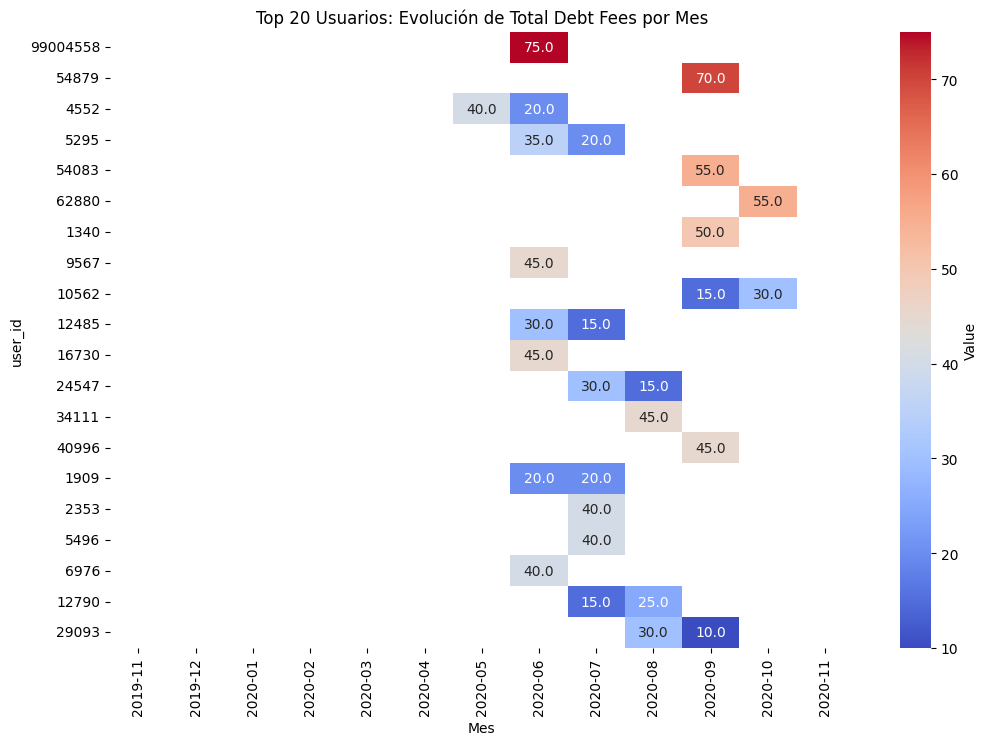

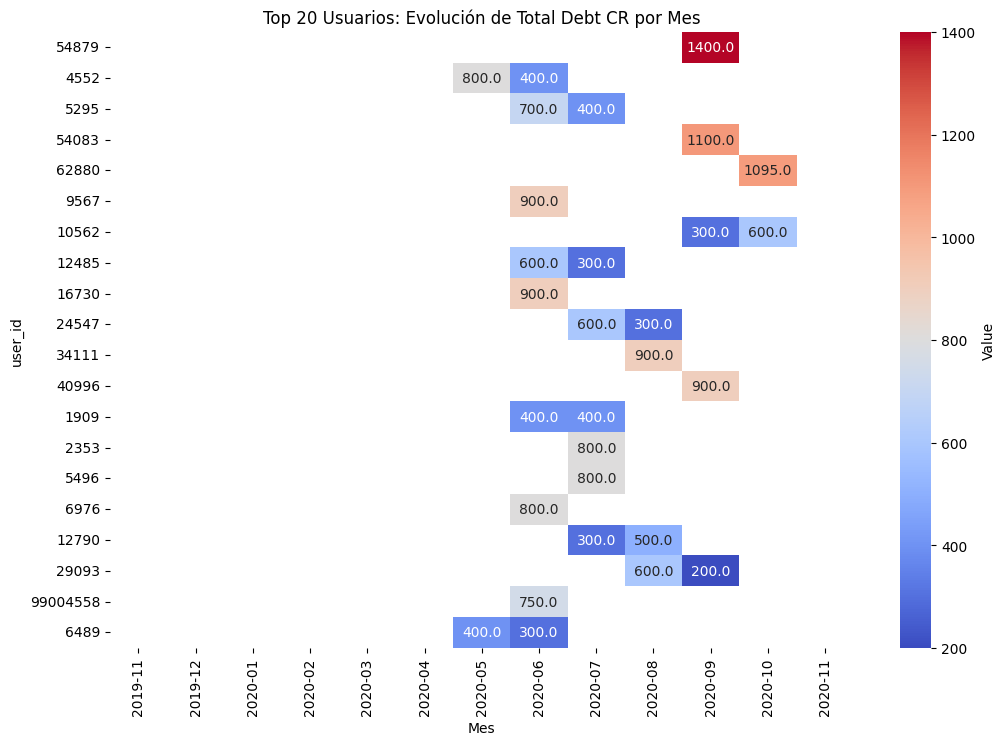

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt


# Seleccionar los top 20 usuarios para cada métrica
top_users_fees = heatmap_fees.sum(axis=1).nlargest(20).index  # Total Debt Fees
top_users_cr = heatmap_cr.sum(axis=1).nlargest(20).index      # Total Debt CR


# Filtrar los datos para los top 20 usuarios
heatmap_fees_top = heatmap_fees.loc[top_users_fees]
heatmap_cr_top = heatmap_cr.loc[top_users_cr]


# Función para graficar heatmaps
def plot_heatmap(data, title, cmap="coolwarm"):
    plt.figure(figsize=(12, 8))
    sns.heatmap(data, annot=True, fmt=".1f", cmap=cmap, cbar_kws={'label': 'Value'})
    plt.title(title)
    plt.xlabel('Mes')
    plt.ylabel('user_id')
    plt.show()

# Graficar los heatmaps para los top usuarios de cada métrica
plot_heatmap(heatmap_fees_top, "Top 20 Usuarios: Evolución de Total Debt Fees por Mes")
plot_heatmap(heatmap_cr_top, "Top 20 Usuarios: Evolución de Total Debt CR por Mes")



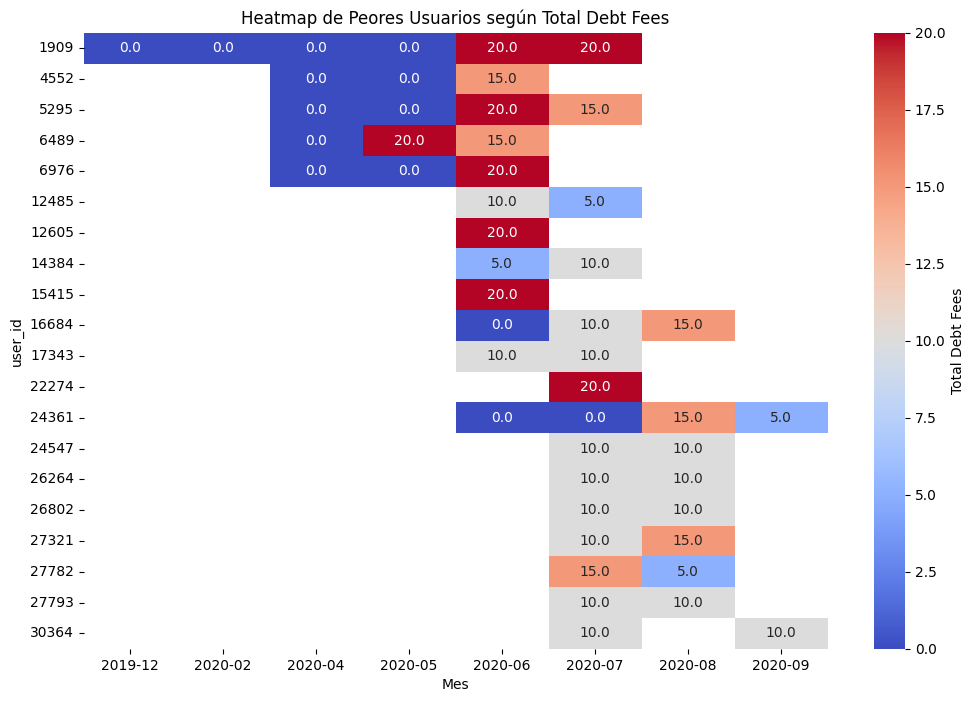

In [ ]:
# 1. Filtrar los usuarios con las tres métricas ordenadas
worst_users = (
    cohort_morosos
    .groupby('user_id')
    .agg(
        total_debt_fees_sum=('total_debt_fees', 'sum'),
        total_debt_cr_sum=('total_debt_cr', 'sum'),
        reimburse_lapse_min=('reimburse_lapse', 'min')  # Más negativo
    )
    .sort_values(
        by=['total_debt_fees_sum', 'total_debt_cr_sum', 'reimburse_lapse_min'], 
        ascending=[False, False, True]  # Fees y CR descendente, lapse ascendente (más negativo)
    )
    .head(20)  # Seleccionar los top 20 peores usuarios
    .index
)

# 2. Filtrar el DataFrame original para incluir solo los usuarios seleccionados
cohort_morosos_worst = cohort_morosos[cohort_morosos['user_id'].isin(worst_users)]

# 3. Pivotar para crear una tabla por usuario y mes
heatmap_data_combined = cohort_morosos_worst.pivot(index='user_id', columns='Mes_created_at', values='total_debt_fees')

# 4. Graficar el heatmap
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data_combined, annot=True, fmt=".1f", cmap="coolwarm", cbar_kws={'label': 'Total Debt Fees'})
plt.title('Heatmap de Peores Usuarios según Total Debt Fees')
plt.xlabel('Mes')
plt.ylabel('user_id')
plt.show()

In [ ]:
# Pivot to show months as columns
cohort_amount_top20 = top_20_users.pivot(index='user_id', columns='Mes_created_at', values='index')

# Display the result
cohort_amount_top20

Mes_created_at,2020-06,2020-08,2020-09,2020-10
user_id,,,,
526,NaN,NaN,NaN,5.357143
1127,NaN,13.636364,NaN,NaN
10606,NaN,NaN,5.000000,NaN
10614,5.000000,NaN,NaN,NaN
12274,7.142857,NaN,NaN,NaN
12934,NaN,NaN,11.764706,50.000000
13964,NaN,5.000000,NaN,5.000000
18148,NaN,NaN,4.166667,NaN
18744,NaN,4.000000,NaN,NaN


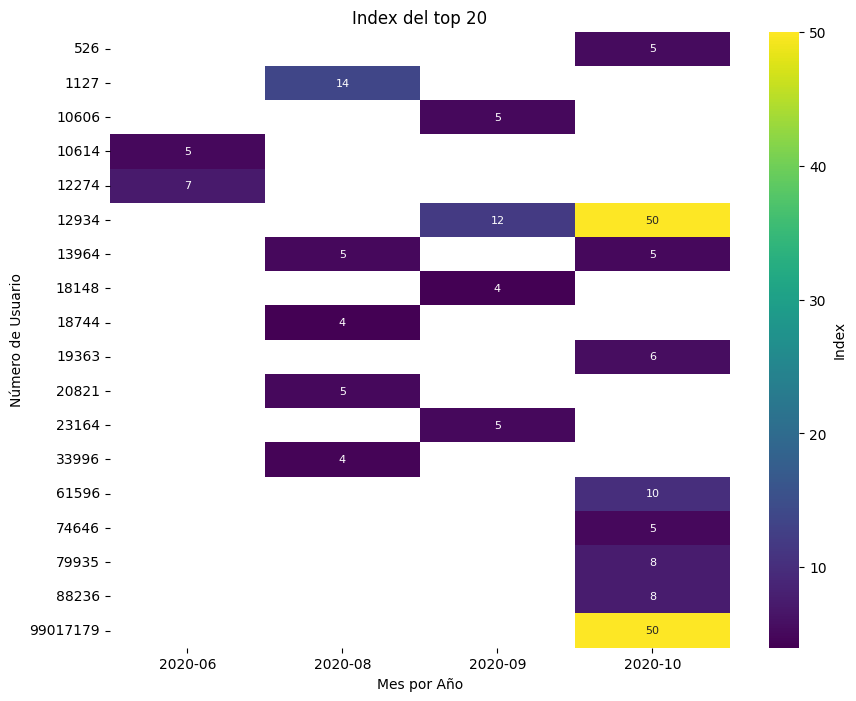

In [ ]:
# Graficar la cantidad de adelanto de efectivo de un cohorte por meses y número de usuarios
plt.figure(figsize=(10, 8))
plt.title('Index del top 20')
sns.heatmap(data=cohort_amount_top20, annot=True, fmt='.0f', cmap='viridis', annot_kws={"size": 8}, cbar_kws={'label': 'Index'})
plt.xlabel('Mes por Año')
plt.ylabel('Número de Usuario')
plt.show()